In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS

# Load the datasets
file1_path = 'educ_data.csv'
file2_path = 'gini_data.csv'
file3_path = 'unemp_data.csv'
file4_path = 'gdppc_data.csv'
file5_path = 'oecd_gini_data.csv'
file6_path = 'world_bank_data.csv'
file7_path = 'world_bank_data_2.csv'

educ_df = pd.read_csv(file1_path)
gini_df = pd.read_csv(file2_path)
unemp_df = pd.read_csv(file3_path)
gdppc_df = pd.read_csv(file4_path)
gini_oecd_df = pd.read_csv(file5_path)
world_bank_df = pd.read_csv(file6_path)
world_bank_2_df = pd.read_csv(file7_path)

In [2]:
year_columns = [str(year) + ' [YR' + str(year) + ']' for year in range(1960, 2024)]

# Cleaning up world bank dataset 1
world_bank_melted_df = world_bank_df.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=year_columns,
    var_name='Year',
    value_name='Value'
)
# Drop rows with no data
world_bank_melted_df = world_bank_melted_df[world_bank_melted_df['Value'] != '..']

# Convert 'Year' to a numerical type if needed (strip out the text around it, like 'YR1960' to just '1960')
world_bank_melted_df['Year'] = world_bank_melted_df['Year'].str.extract('(\d+)').astype(int)
world_bank_melted_df['Value'] = pd.to_numeric(world_bank_melted_df['Value'], errors='coerce')

# Pivot the DataFrame without dropping the Year column
world_bank_pivot_df = world_bank_melted_df.pivot_table(index=['Country Name', 'Country Code', 'Year'], 
                                                 columns='Series Name', 
                                                 values='Value', 
                                                 fill_value=0).reset_index()

# Rename selected columns
world_bank_pivot_df.rename(columns={
    "Population living in slums (% of urban population)": "Slum Population (%)",
    "High-technology exports (% of manufactured exports)": "High-tech Exports (%)",
    "Political Stability and Absence of Violence/Terrorism: Estimate": "Pol Stability",
    "Individuals using the Internet (% of population)": "Internet Use (%)",
    "Government Effectiveness: Estimate": "Govt Eff",
    "Control of Corruption: Estimate": "Control Corr",
    "Social contributions (current LCU)": "Soc Cont",
    "Share of youth not in education, employment or training, total (% of youth population)": "Unproductive Youth (%)"
}, inplace=True)

# Cleaning up world bank dataset 2
world_bank_2_melted_df = world_bank_2_df.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    value_vars=year_columns,
    var_name='Year',
    value_name='Value'
)
# Drop rows with no data
world_bank_2_melted_df = world_bank_2_melted_df[world_bank_2_melted_df['Value'] != '..']

# Convert 'Year' to a numerical type if needed (strip out the text around it, like 'YR1960' to just '1960')
world_bank_2_melted_df['Year'] = world_bank_2_melted_df['Year'].str.extract('(\d+)').astype(int)
world_bank_2_melted_df['Value'] = pd.to_numeric(world_bank_2_melted_df['Value'], errors='coerce')

# Pivot the DataFrame without dropping the Year column
world_bank_2_pivot_df = world_bank_2_melted_df.pivot_table(index=['Country Name', 'Country Code', 'Year'], 
                                                 columns='Series Name', 
                                                 values='Value', 
                                                 fill_value=0).reset_index()

# Rename selected columns
world_bank_2_pivot_df.rename(columns={
    "Gross domestic savings (% of GDP)": "Domestic Savings (%)",
    "Fertility rate, total (births per woman)": "Fertility Rate",
    "Wanted fertility rate (births per woman)": "Wanted Fertility Rate",
    "Poverty gap at $2.15 a day (2017 PPP) (%)": "Poverty Gap ($2.15) (%)",
    "Poverty gap at $3.65 a day (2017 PPP) (%)": "Poverty Gap ($3.65) (%)",
    "Poverty gap at $6.85 a day (2017 PPP) (%)": "Poverty Gap ($6.85) (%)"
}, inplace=True)

# Extract columns of interest to be merged
columns_of_interest_1 = [
    "Country Name",
    "Country Code",
    "Year",
    "Slum Population (%)",
    "High-tech Exports (%)",
    "Pol Stability",
    "Internet Use (%)",
    "Govt Eff",
    "Control Corr",
    "Soc Cont",
    "Unproductive Youth (%)"
]

columns_of_interest_2 = [
    "Country Name",
    "Country Code",
    "Year",
    "Domestic Savings (%)",
    "Fertility Rate",
    "Wanted Fertility Rate",
    "Poverty Gap ($2.15) (%)",
    "Poverty Gap ($3.65) (%)",
    "Poverty Gap ($6.85) (%)"
]

world_bank_subset_df = world_bank_pivot_df[columns_of_interest_1]
world_bank_2_subset_df = world_bank_2_pivot_df[columns_of_interest_2]

world_bank_subset_df = world_bank_subset_df[
    (world_bank_subset_df['Year'] >= 1991) & 
    (world_bank_subset_df['Year'] <= 2024)
]

world_bank_2_subset_df = world_bank_2_subset_df[
    (world_bank_2_subset_df['Year'] >= 1991) & 
    (world_bank_2_subset_df['Year'] <= 2024)
]

world_bank_subset_df = world_bank_subset_df.dropna()
world_bank_2_subset_df = world_bank_2_subset_df.dropna()

big_world_bank_df = pd.merge(world_bank_subset_df,world_bank_2_subset_df,on=["Country Code","Year"])
big_world_bank_df.head()

Series Name,Country Name_x,Country Code,Year,Slum Population (%),High-tech Exports (%),Pol Stability,Internet Use (%),Govt Eff,Control Corr,Soc Cont,Unproductive Youth (%),Country Name_y,Domestic Savings (%),Fertility Rate,Wanted Fertility Rate,Poverty Gap ($2.15) (%),Poverty Gap ($3.65) (%),Poverty Gap ($6.85) (%)
0,Afghanistan,AFG,1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,0.0,7.606,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,0.0,7.665,0.0,0.0,0.0,0.0
2,Afghanistan,AFG,1993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,0.0,7.719,0.0,0.0,0.0,0.0
3,Afghanistan,AFG,1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,0.0,7.717,0.0,0.0,0.0,0.0
4,Afghanistan,AFG,1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,0.0,7.712,0.0,0.0,0.0,0.0


In [3]:
# Clean unemp_df
id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']  

year_columns = unemp_df.columns[4:]  # All the year columns, starting from the 5th column onward

# Melt the dataframe to bring year columns into rows
unemp_df = pd.melt(unemp_df, id_vars=id_vars, value_vars=year_columns, var_name='Year', value_name='Unemp %')

# Drop rows with no data
unemp_df = unemp_df.dropna(subset=['Unemp %'])

# Convert 'Year' to a numerical type
unemp_df['Year'] = unemp_df['Year'].astype(int)

# Clean educ_df
id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code']  

year_columns = educ_df.columns[4:]  # All the year columns, starting from the 5th column onward

# Melt the dataframe to bring year columns into rows
educ_df = pd.melt(educ_df, id_vars=id_vars, value_vars=year_columns, var_name='Year', value_name='Average years of schooling')

# Drop rows with no data
educ_df = educ_df[educ_df['Average years of schooling'] != '..']

# Convert 'Year' to a numerical type and strip out the text around it
educ_df['Year'] = educ_df['Year'].str.extract('(\d+)').astype(int)


# Clean GDP Per capita

id_vars = ['Series Name', 'Series Code', 'Country Name', 'Country Code']  

year_columns = gdppc_df.columns[4:]  # All the year columns, starting from the 5th column onward

# Melt the dataframe to bring year columns into rows
gdppc_df = pd.melt(gdppc_df, id_vars=id_vars, value_vars=year_columns, var_name='Year', value_name='GDPPC')

# Drop rows with no data
gdppc_df = gdppc_df.dropna(subset=['GDPPC'])

# Convert 'Year' to a numerical type and strip out the text around it
gdppc_df['Year'] = gdppc_df['Year'].str.extract('(\d+)').astype(int)

# Clean gini_df

id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']  

year_columns = gini_df.columns[4:]  # All the year columns, starting from the 5th column onward

# Melt the dataframe to bring year columns into rows
gini_df = pd.melt(gini_df, id_vars=id_vars, value_vars=year_columns, var_name='Year', value_name='Gini_coefficient')

# Convert 'Year' to a numerical type and strip out the text around it
gini_df['Year'] = gini_df['Year'].astype(int)

# Clean OECD Gini

id_vars = ['Countries']

year_columns = gini_oecd_df.columns[1:]  # All the year columns, starting from the 5th column onward

# Melt the dataframe to bring year columns into rows
gini_oecd_df = pd.melt(gini_oecd_df, id_vars=id_vars, value_vars=year_columns, var_name='Year', value_name='Gini_coefficient')
gini_oecd_df['Gini_coefficient'] = gini_oecd_df['Gini_coefficient']*100

# Drop rows with no data
gini_oecd_df = gini_oecd_df.dropna(subset=['Gini_coefficient'])

# Convert 'Year' to a numerical type and strip out the text around it
gini_oecd_df['Year'] = gini_oecd_df['Year'].astype(int)

# Rename countries column to Country Code for easier merging
gini_oecd_df = gini_oecd_df.rename(columns={'Countries': 'Country Code'})

# Combining gini datasets
merged_gini_df = pd.merge(gini_df, gini_oecd_df[['Country Code', 'Year', 'Gini_coefficient']], 
                     on=['Country Code', 'Year'], 
                     how='outer', 
                     suffixes=('', '_OECD'))

# Combine Gini values, prioritizing the main DataFrame first
merged_gini_df['Gini_coefficient'] = merged_gini_df['Gini_coefficient'].combine_first(merged_gini_df['Gini_coefficient_OECD'])

# Drop the extra OECD Gini column
merged_gini_df = merged_gini_df.drop(columns=['Gini_coefficient_OECD'])

# Forward fill missing values for each country
merged_gini_df['Gini_coefficient'] = merged_gini_df.groupby('Country Code')['Gini_coefficient'].ffill()

# Remove rows that are still missing Gini values, if needed
merged_gini_df = merged_gini_df.dropna(subset=['Gini_coefficient'])

# Check the resulting DataFrame
print(merged_gini_df.head())

       Country Name Country Code Indicator Name Indicator Code  Year  \
1049  United States          USA     Gini index    SI.POV.GINI  1963   
1315  United States          USA     Gini index    SI.POV.GINI  1964   
1581  United States          USA     Gini index    SI.POV.GINI  1965   
1847  United States          USA     Gini index    SI.POV.GINI  1966   
2113  United States          USA     Gini index    SI.POV.GINI  1967   

      Gini_coefficient  
1049              37.6  
1315              38.1  
1581              37.5  
1847              37.8  
2113              36.9  


In [4]:
unemp_df = unemp_df.drop(columns=['Country Name'])
educ_df = educ_df.drop(columns=['Country Name'])
gdppc_df = gdppc_df.drop(columns=['Country Name'])

merged_df = pd.merge(merged_gini_df,unemp_df,left_on=["Country Code","Year"],right_on=["Country Code","Year"])
#merged_df = pd.merge(merged_df,educ_df,left_on=["Country Code","Year"],right_on=["Country Code","Year"])
merged_df = pd.merge(merged_df, gdppc_df,left_on=["Country Code","Year"],right_on=["Country Code","Year"])
merged_df = pd.merge(merged_df,big_world_bank_df,left_on=["Country Code","Year"],right_on=["Country Code","Year"])

columns_req = ["Country Code",
                "Year",
                "GDPPC", 
                "Gini_coefficient",
                "Unemp %",
                #'Average years of schooling', 
                "Slum Population (%)",
                "High-tech Exports (%)",
                "Pol Stability",
                "Internet Use (%)",
                "Govt Eff",
                "Control Corr",
                "Soc Cont",
                "Unproductive Youth (%)",
                "Domestic Savings (%)",
                "Fertility Rate",
                "Wanted Fertility Rate",
                "Poverty Gap ($2.15) (%)",
                "Poverty Gap ($3.65) (%)",
                "Poverty Gap ($6.85) (%)"
            ]

merged_df = merged_df[columns_req]

# Creating dummies for HDI level
very_high_hdi_countries = [
    "CHE", "NOR", "ISL", "HKG", "DNK", "SWE", "DEU", "IRL", "SGP", "AUS", 
    "NLD", "BEL", "FIN", "LIE", "GBR", "NZL", "ARE", "CAN", "KOR", "LUX", 
    "USA", "AUT", "SVN", "JPN", "ISR", "MLT", "ESP", "FRA", "CYP", "ITA", 
    "EST", "CZE", "GRC", "BHR", "AND", "POL", "LVA", "LTU", "HRV", 
    "QAT", "SAU", "PRT", "SMR", "CHL", "SVK", "TUR", "HUN", "ARG", 
    "KWT", "MNE", "KNA", "URY", "ROU", "ATG", "BRN", "RUS", "BHS", 
    "PAN", "OMN", "GEO", "TTO", "BRB", "MYS", "CRI", "SRB", "THA", 
    "KAZ", "SYC", "BLR"
]


high_hdi_countries = [
    "BGR", "PLW", "MUS", "GRD", "ALB", "CHN", "ARM", "MEX", "IRN", "LKA", 
    "BIH", "VCT", "DOM", "ECU", "MKD", "CUB", "MDA", "MDV", "PER", 
    "AZE", "BRA", "COL", "LBY", "DZA", "TKM", "GUY", "MNG", "DMA", 
    "TON", "JOR", "UKR", "TUN", "MHL", "PRY", "FJI", "EGY", "UZB", 
    "VNM", "LCA", "LBN", "ZAF", "PSE", "IDN", "PHL", "BWA", "JAM", 
    "WSM", "KGZ", "BLZ"
]

medium_hdi_countries = [
    "VEN", "BOL", "MAR", "NRU", "GAB", "SUR", "BTN", "TJK", "SLV", 
    "IRQ", "BGD", "NIC", "CPV", "TUV", "GNQ", "IND", "FSM", "GTM", 
    "KIR", "HND", "LAO", "VUT", "STP", "SWZ", "NAM", "MMR", "GHA", 
    "KEN", "NPL", "KHM", "COG", "AGO", "CMR", "COM", "ZMB", 
    "PNG", "TLS", "SLB", "SYR", "HTI", "UGA", "ZWE"
]

# Low HDI is the baseline; no dummy
# Create the dummy columns for the 4 categories
merged_df['Very High HDI'] = merged_df['Country Code'].apply(lambda x: 1 if x in very_high_hdi_countries else 0)
merged_df['High HDI'] = merged_df['Country Code'].apply(lambda x: 1 if x in high_hdi_countries else 0)
merged_df['Medium HDI'] = merged_df['Country Code'].apply(lambda x: 1 if x in medium_hdi_countries else 0)

# Create year dummies
year_dummies = pd.get_dummies(merged_df['Year'], prefix='Year')
merged_df = pd.concat([merged_df, year_dummies], axis=1)

# Step 2: Drop duplicate rows
merged_df = merged_df.drop_duplicates().reset_index(drop=True)
merged_df = merged_df.set_index(["Country Code","Year"])

merged_df.head()

,,GDPPC,Gini_coefficient,Unemp %,Slum Population (%),High-tech Exports (%),Pol Stability,Internet Use (%),Govt Eff,Control Corr,Soc Cont,...,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023
Country Code,Year,,,,,,,,,,,,,,,,,,,,,
ARG,1991,5730.72381,46.8,5.440,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
AUS,1991,18859.40796,33.2,9.586,0.0,0.0,0.0,1.097204,0.0,0.0,561000000.0,...,False,False,False,False,False,False,False,False,False,False
BEL,1991,21041.66065,25.7,6.984,0.0,0.0,0.0,0.020073,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
BGD,1991,283.3822853,27.6,2.200,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
BOL,1991,737.521442,42.0,2.927,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

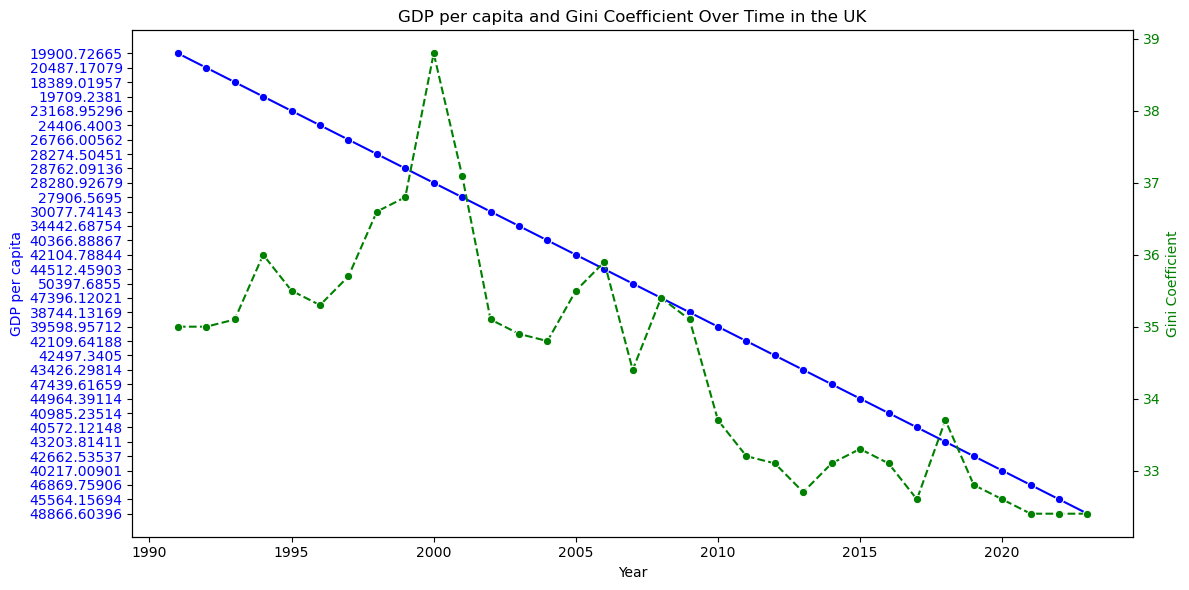

In [21]:
# Isolate data for the UK
gbr_df = merged_df.loc['GBR']
gbr_df.head()

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot GDP per capita on the first y-axis
sns.lineplot(data=gbr_df, x="Year", y="GDPPC", ax=ax1, color="b", marker="o")
ax1.set_ylabel("GDP per capita", color="b")
ax1.tick_params(axis="y", labelcolor="b")

# Create a second y-axis for the Gini coefficient
ax2 = ax1.twinx()
sns.lineplot(data=gbr_df, x="Year", y="Gini_coefficient", ax=ax2, color="g", marker="o", linestyle="--")
ax2.set_ylabel("Gini Coefficient", color="g")
ax2.tick_params(axis="y", labelcolor="g")

# Add a title and show the plot
plt.title("GDP per capita and Gini Coefficient Over Time in the UK")
plt.xticks(rotation=45)
fig.tight_layout()  # Adjust layout to prevent label overlap
plt.show()

In [22]:
print(gbr_df)

            GDPPC  Gini_coefficient  Unemp %  Slum Population (%)  \
Year                                                                
1991  19900.72665              35.0    8.550                  0.0   
1992  20487.17079              35.0    9.772                  0.0   
1993  18389.01957              35.1   10.346                  0.0   
1994   19709.2381              36.0    9.648                  0.0   
1995  23168.95296              35.5    8.694                  0.0   
1996   24406.4003              35.3    8.189                  0.0   
1997  26766.00562              35.7    7.072                  0.0   
1998  28274.50451              36.6    6.198                  0.0   
1999  28762.09136              36.8    6.042                  0.0   
2000  28280.92679              38.8    5.558                  0.0   
2001   27906.5695              37.1    4.696                  0.0   
2002  30077.74143              35.1    5.037                  0.0   
2003  34442.68754              34.